In [5]:
# https://stackoverflow.com/questions/16249736/how-to-import-data-from-mongodb-to-pandas
import pymongo
import pandas as pd
from pymongo import MongoClient

In [19]:
client = MongoClient('mongodb://192.168.0.105:27017/')
#client = MongoClient('mongodb://localhost:27017')
client

MongoClient(host=['192.168.0.105:27017'], document_class=dict, tz_aware=False, connect=True)

In [20]:
db = client.geometry
db

Database(MongoClient(host=['192.168.0.105:27017'], document_class=dict, tz_aware=False, connect=True), 'geometry')

In [21]:
objects = db.objects

In [22]:
data = pd.DataFrame(list(objects.find().limit(10000)))

In [23]:
data.head()

,_id,Color,Layer,LineWeight,Linetype,ObjectId,ClassName,Position,TextString,FileId,...,Vertixes,MTextAttributeDefinition,Prompt,Tag,ParentFileId,Vertices,IsFrozen,IsHidden,IsOff,IsPlottable
0,5fd0b322f85a8e987bfcca05,cyan,PLOTTER,ByLayer,CONTINUOUS,2264227935920,AcDbText,"{'ClassName': 'Point3D', 'X': 24.2434271846488...",Pen Width HP Designjet 755 (mm),6cceaf8d-aaff-404f-8f42-a4e6d9e64e0a,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5fd0b322f85a8e987bfcca06,cyan,PLOTTER,ByLayer,CONTINUOUS,2264227938224,AcDbText,"{'ClassName': 'Point3D', 'X': 25.2810031605405...",6,6cceaf8d-aaff-404f-8f42-a4e6d9e64e0a,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5fd0b322f85a8e987bfcca07,cyan,PLOTTER,ByLayer,CONTINUOUS,2264227935984,AcDbText,"{'ClassName': 'Point3D', 'X': 25.2810031605405...",7,6cceaf8d-aaff-404f-8f42-a4e6d9e64e0a,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5fd0b322f85a8e987bfcca08,cyan,PLOTTER,ByLayer,CONTINUOUS,2264227938352,AcDbText,"{'ClassName': 'Point3D', 'X': 25.2810031605405...",3,6cceaf8d-aaff-404f-8f42-a4e6d9e64e0a,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5fd0b322f85a8e987bfcca09,cyan,PLOTTER,ByLayer,CONTINUOUS,2264227938544,AcDbText,"{'ClassName': 'Point3D', 'X': 25.2810031605405...",4,6cceaf8d-aaff-404f-8f42-a4e6d9e64e0a,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
data.groupby(['ClassName']).count()

,_id,Color,Layer,LineWeight,Linetype,ObjectId,Position,TextString,FileId,Attributes,...,Vertixes,MTextAttributeDefinition,Prompt,Tag,ParentFileId,Vertices,IsFrozen,IsHidden,IsOff,IsPlottable
ClassName,,,,,,,,,,,,,,,,,,,,,
AcDbArc,76,76,76,76,76,76,0,0,76,0,...,0,0,0,0,0,0,0,0,0,0
AcDbAttributeDefinition,270,270,270,270,270,270,270,0,270,0,...,0,0,270,270,0,0,0,0,0,0
AcDbBlockReference,48,48,48,48,48,48,48,0,48,48,...,0,0,0,0,0,0,0,0,0,0
AcDbCircle,42,42,42,42,42,42,0,0,42,0,...,0,0,0,0,0,0,0,0,0,0
AcDbHatch,52,52,52,52,52,52,0,0,52,0,...,0,0,0,0,0,0,0,0,0,0
AcDbLayerTableRecord,36,36,0,36,36,36,0,0,36,0,...,0,0,0,0,0,0,36,36,36,36
AcDbLine,4694,4694,4694,4694,4694,4694,0,0,4694,0,...,0,0,0,0,0,0,0,0,0,0
AcDbMText,15,15,15,15,15,15,15,15,15,0,...,0,0,0,0,0,0,0,0,0,0
AcDbPoint,54,54,54,54,54,54,54,0,54,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
#test drawSvg
# https://pypi.org/project/drawSvg/
# !pip install drawsvg
# Works on linux only!
# sudo apt-get install libcairo2
import drawSvg as draw
def plotLine(StartPoint, EndPoint):
    d = draw.Drawing(200,100,origin = 'center', displayInline = False)
    d.append(draw.Lines(StartPoint.X, StartPoint.Y, EndPoint.X, EndPoint.Y, close = False, fill='#eeee00', stroke = 'black'))
    d.setPixelScale(2)
    d.rasterize()
    return(d)

class pnt2:
    def __init__(self, x,y):
        self.X = x
        self.Y = y
start = pnt2(100,200)
end = pnt2(0,0)
plotLine(start,end)

In [26]:
fileidsWithDims = objects.find({'ClassName':'AcDbRotatedDimension'}).distinct('FileId')[:7]
fileidsWithDims

['006f290c-7280-491b-b7d7-971ed82de1a5',
 '007bceda-c8e6-4cc7-97f9-270adf44b19c',
 '0100c16b-c7c9-4265-92b9-950bf5d2c9ec',
 '013edfac-9865-4422-a5f2-3220d142116d',
 '0195a12e-0226-4de9-b2a7-04c149af4aa0',
 '01aaf254-a108-4bb2-98c5-38caa8ab1efd',
 '01afac87-2be6-4a8e-9a95-66c1c54d5165']

In [27]:
query = {
    'ClassName':
    {
        '$in':[
            'AcDbLine',
            'AcDbText',
            'AcDbRotatedDimension'
        ]
    },
    'FileId':{
        '$in':fileidsWithDims
    }
}

simple_objects = pd.DataFrame(list(objects.find(query)))
simple_objects

,_id,Color,Layer,LineWeight,Linetype,ObjectId,ClassName,Position,TextString,FileId,EndPoint,Length,StartPoint,DimLinePoint,DimensionStyleName,DimensionText,TextPosition,XLine1Point,XLine2Point
0,5fd0c4c8fe680417b0e35513,cyan,PLOTTER,ByLayer,CONTINUOUS,2983534820080,AcDbText,"{'ClassName': 'Point3D', 'X': 7.69577632622433...",Pen Width HP Designjet 755 (mm),006f290c-7280-491b-b7d7-971ed82de1a5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5fd0c4c8fe680417b0e35514,cyan,PLOTTER,ByLayer,CONTINUOUS,2983534820144,AcDbText,"{'ClassName': 'Point3D', 'X': 8.73335230211607...",6,006f290c-7280-491b-b7d7-971ed82de1a5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5fd0c4c8fe680417b0e35515,cyan,PLOTTER,ByLayer,CONTINUOUS,2983534820208,AcDbText,"{'ClassName': 'Point3D', 'X': 8.73335230211607...",7,006f290c-7280-491b-b7d7-971ed82de1a5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5fd0c4c8fe680417b0e35516,cyan,PLOTTER,ByLayer,CONTINUOUS,2983534821488,AcDbText,"{'ClassName': 'Point3D', 'X': 8.73335230211607...",3,006f290c-7280-491b-b7d7-971ed82de1a5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5fd0c4c8fe680417b0e35517,cyan,PLOTTER,ByLayer,CONTINUOUS,2983534820272,AcDbText,"{'ClassName': 'Point3D', 'X': 8.73335230211607...",4,006f290c-7280-491b-b7d7-971ed82de1a5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4281,5fd1df7360505b08aa538aae,BYLAYER,!!!Балки_М_главные,ByLayer,ByLayer,2282349974384,AcDbLine,NaN,NaN,01afac87-2be6-4a8e-9a95-66c1c54d5165,"{'ClassName': 'Point3D', 'X': -83225.448570519...",16.289704,"{'ClassName': 'Point3D', 'X': -83213.930010333...",NaN,NaN,NaN,NaN,NaN,NaN
4282,5fd1df7360505b08aa538aaf,BYLAYER,!!!Балки_М_главные,ByLayer,ByLayer,2282349974192,AcDbLine,NaN,NaN,01afac87-2be6-4a8e-9a95-66c1c54d5165,"{'ClassName': 'Point3D', 'X': -83213.930010333...",16.289704,"{'ClassName': 'Point3D', 'X': -83225.448570519...",NaN,NaN,NaN,NaN,NaN,NaN
4283,5fd1df7360505b08aa538ab0,BYLAYER,Фахверк,LineWeight020,ByLayer,2282349976496,AcDbLine,NaN,NaN,01afac87-2be6-4a8e-9a95-66c1c54d5165,"{'ClassName': 'Point3D', 'X': -82821.222844676...",377.340863,"{'ClassName': 'Point3D', 'X': -83198.563707603...",NaN,NaN,NaN,NaN,NaN,NaN
4284,5fd1df7360505b08aa538ab1,BYLAYER,Фахверк,LineWeight020,ByLayer,2282349974896,AcDbLine,NaN,NaN,01afac87-2be6-4a8e-9a95-66c1c54d5165,"{'ClassName': 'Point3D', 'X': -82821.222844676...",377.340863,"{'ClassName': 'Point3D', 'X': -83198.563707603...",NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
simple_objects.groupby(['FileId','ClassName']).count()

_id  Color  Layer  \
FileId                               ClassName                                  
006f290c-7280-491b-b7d7-971ed82de1a5 AcDbLine               288    288    288   
                                     AcDbRotatedDimension    43     43     43   
                                     AcDbText               147    147    147   
007bceda-c8e6-4cc7-97f9-270adf44b19c AcDbLine              1027   1027   1027   
                                     AcDbRotatedDimension   210    210    210   
                                     AcDbText               319    319    319   
0100c16b-c7c9-4265-92b9-950bf5d2c9ec AcDbLine               176    176    176   
                                     AcDbRotatedDimension     5      5      5   
                                     AcDbText                96     96     96   
013edfac-9865-4422-a5f2-3220d142116d AcDbLine               999    999    999   
                                     AcDbRotatedDimension    66     66     66   
                                     AcDbText               200    200    200   
0195a12e-0226-4de9-b2a7-04c149af4aa0 AcDbLine               587    587    587   
                                     AcDbRotatedDimension    16     16     16   
                                     AcDbText                40     40     40   
01aaf254-a108-4bb2-98c5-38caa8ab1efd AcDbLine                 2      2      2   
                                     AcDbRotatedDimension     4      4      4   
01afac87-2be6-4a8e-9a95-66c1c54d5165 AcDbLine                56     56     56   
                                     AcDbRotatedDimension     5      5      5   

                                                           LineWeight  \
FileId                               ClassName                          
006f290c-7280-491b-b7d7-971ed82de1a5 AcDbLine                     288   
                                     AcDbRotatedDimension          43   
                                     AcDbText                     147   
007bceda-c8e6-4cc7-97f9-270adf44b19c AcDbLine                    1027   
                                     AcDbRotatedDimension         210   
                                     AcDbText                     319   
0100c16b-c7c9-4265-92b9-950bf5d2c9ec AcDbLine                     176   
                                     AcDbRotatedDimension           5   
                                     AcDbText                      96   
013edfac-9865-4422-a5f2-3220d142116d AcDbLine                     999   
                                     AcDbRotatedDimension          66   
                                     AcDbText                     200   
0195a12e-0226-4de9-b2a7-04c149af4aa0 AcDbLine                     587   
                                     AcDbRotatedDimension          16   
                                     AcDbText                      40   
01aaf254-a108-4bb2-98c5-38caa8ab1efd AcDbLine                       2   
                                     AcDbRotatedDimension           4   
01afac87-2be6-4a8e-9a95-66c1c54d5165 AcDbLine                      56   
                                     AcDbRotatedDimension           5   

                                                           Linetype  ObjectId  \
FileId                               ClassName                                  
006f290c-7280-491b-b7d7-971ed82de1a5 AcDbLine                   288       288   
                                     AcDbRotatedDimension        43        43   
                                     AcDbText                   147       147   
007bceda-c8e6-4cc7-97f9-270adf44b19c AcDbLine                  1027      1027   
                                     AcDbRotatedDimension       210       210   
                                     AcDbText                   319       319   
0100c16b-c7c9-4265-92b9-950bf5d2c9ec AcDbLine                   176       176   
                                     AcDbRotatedDimension         5         5   
              

In [29]:
groupped = simple_objects.groupby(['FileId'])

In [39]:
images = []

for name, group in groupped:
    d = draw.Drawing(800, 400, origin=(0,0), displayInline = False)
    
    # skip small drawings
    #if (len(group)<100):
    #    continue
    
    print(name)
    for row_index, row in group.iterrows():
        if row['ClassName'] == 'AcDbLine':
            d.append(
                draw.Lines(
                    row['StartPoint']['X'],
                    row['StartPoint']['Y'],
                    row['EndPoint']['X'],
                    row['EndPoint']['Y'],
                    close = False,
                    fill='#eeee00',
                    stroke = 'black'))
        # https://github.com/cduck/drawSvg/blob/master/drawSvg/elements.py
        if row['ClassName'] == 'AcDbText':
            #print(row)
            d.append(
                draw.Text(
                    row['TextString'],
                    6,
                    row['Position']['X'],
                    row['Position']['Y'],
                    center = False
                )
            )
        if row['ClassName'] == 'AcDbRotatedDimension':
            #print(row)
            dim = draw.Lines(
                    row['XLine1Point']['X'],
                    row['XLine1Point']['Y'],
                    row['XLine2Point']['X'],
                    row['XLine2Point']['Y'],
                    close = False,
                    fill='#eeee00',
                    stroke = 'blue',
                    stroke_width = '4'
            )
            
            # https://github.com/cduck/drawSvg
            dim.appendTitle(row['DimensionText'])
            d.append(dim)
            
            
    #https://pypi.org/project/drawSvg/
    d.setPixelScale(2)
    r = d.rasterize()
    filename = name+'.png'
    d.savePng(filename)
    #d.saveSvg(filename+'.svg')
    images.append(filename)

006f290c-7280-491b-b7d7-971ed82de1a5
007bceda-c8e6-4cc7-97f9-270adf44b19c
0100c16b-c7c9-4265-92b9-950bf5d2c9ec
013edfac-9865-4422-a5f2-3220d142116d
0195a12e-0226-4de9-b2a7-04c149af4aa0
01aaf254-a108-4bb2-98c5-38caa8ab1efd
01afac87-2be6-4a8e-9a95-66c1c54d5165


006f290c-7280-491b-b7d7-971ed82de1a5.png


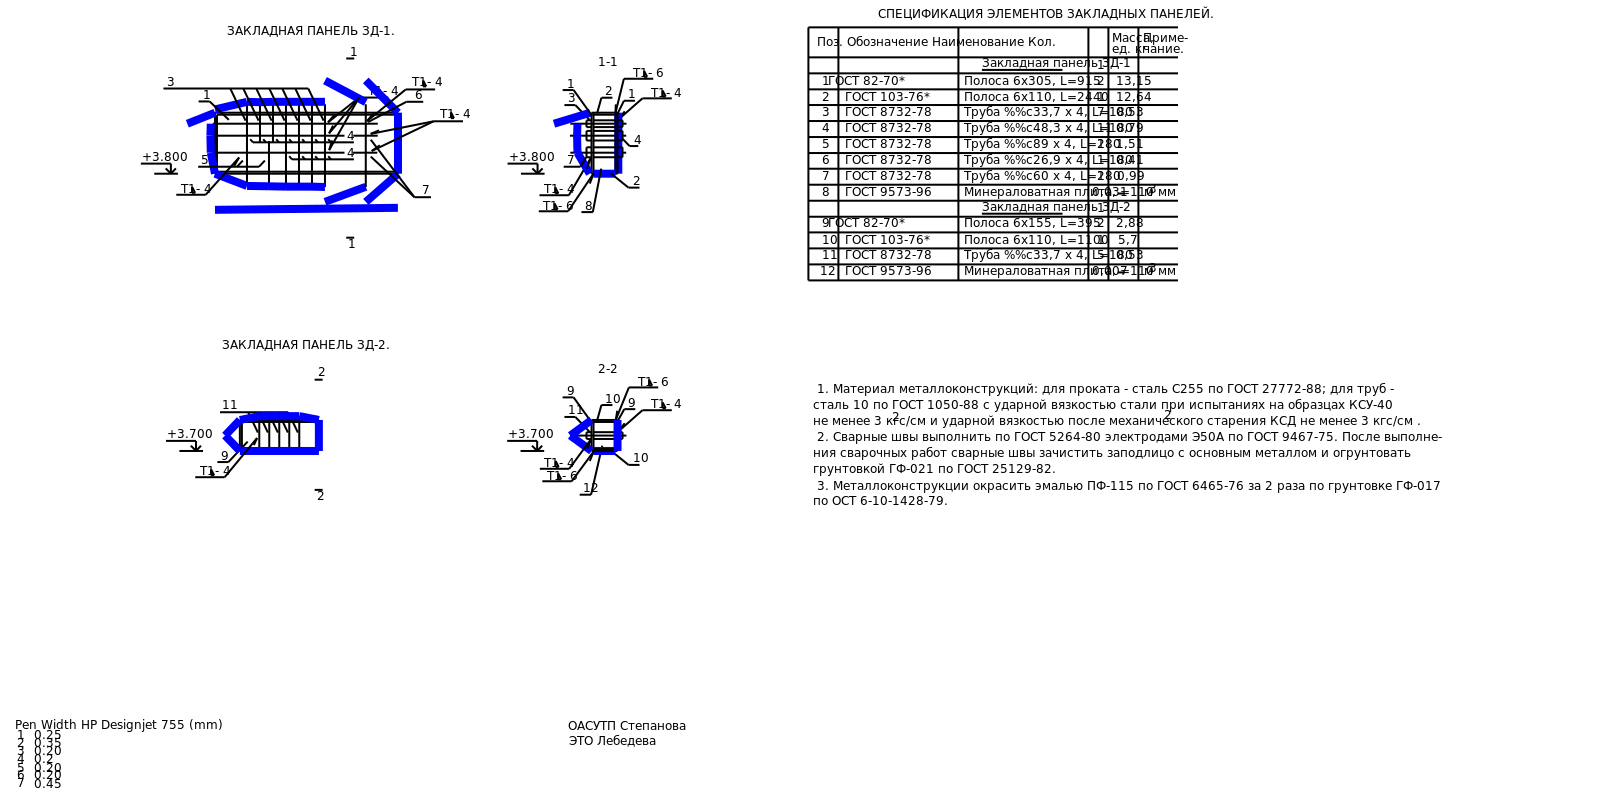

007bceda-c8e6-4cc7-97f9-270adf44b19c.png


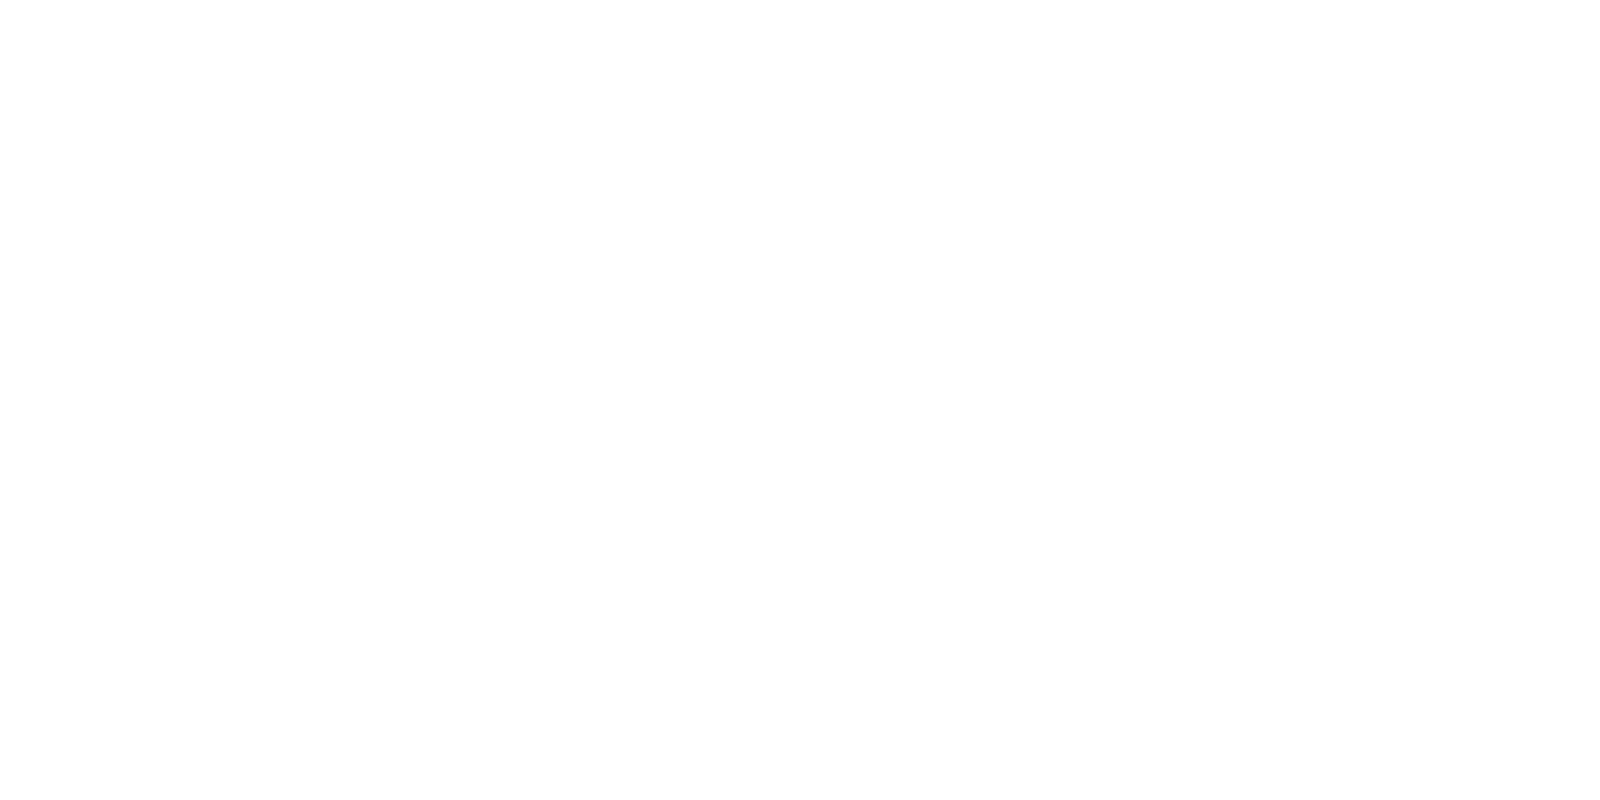

0100c16b-c7c9-4265-92b9-950bf5d2c9ec.png


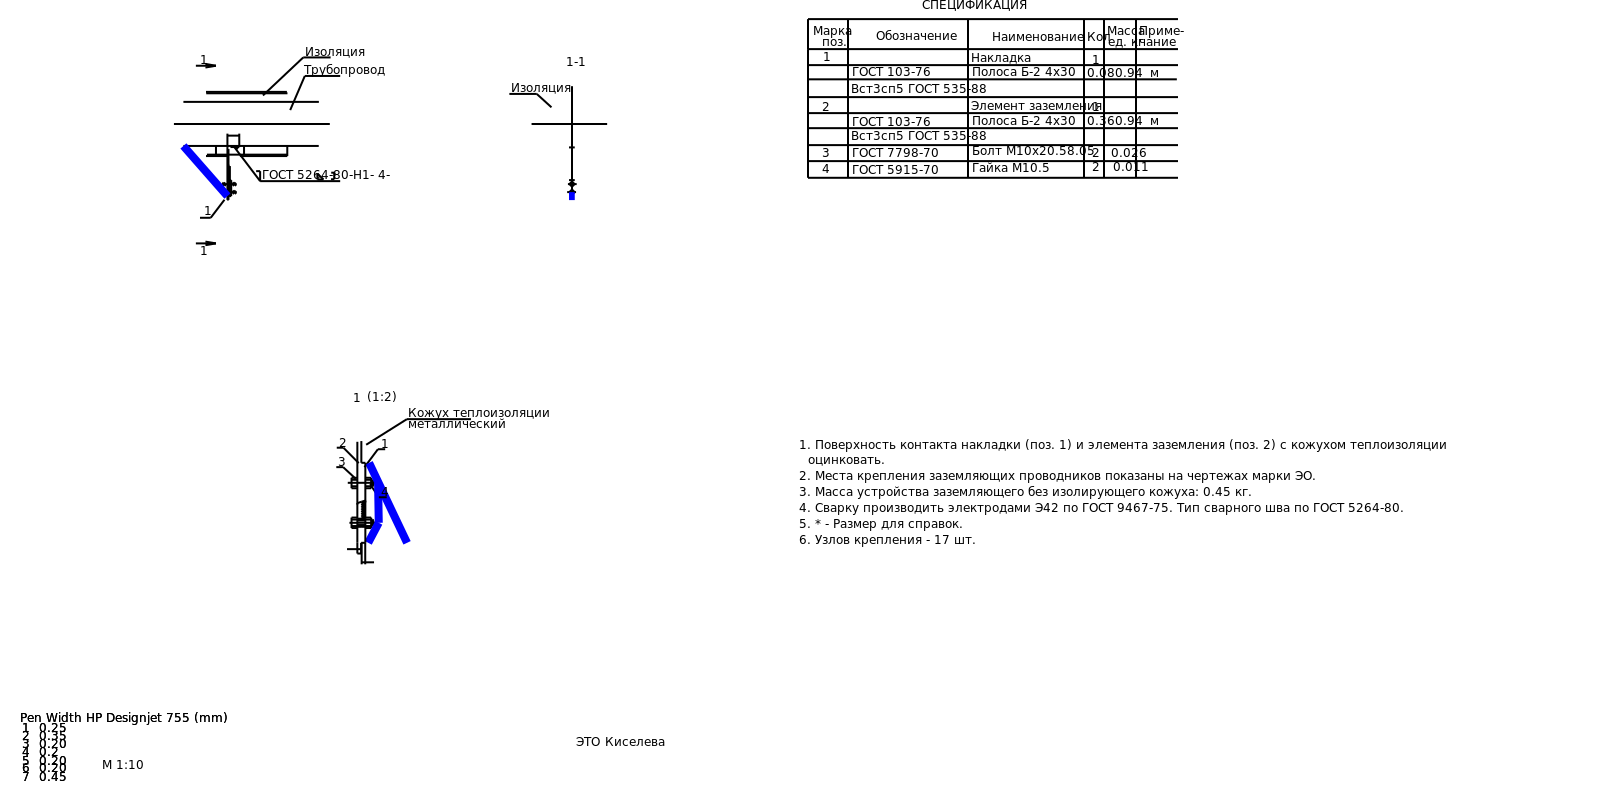

013edfac-9865-4422-a5f2-3220d142116d.png


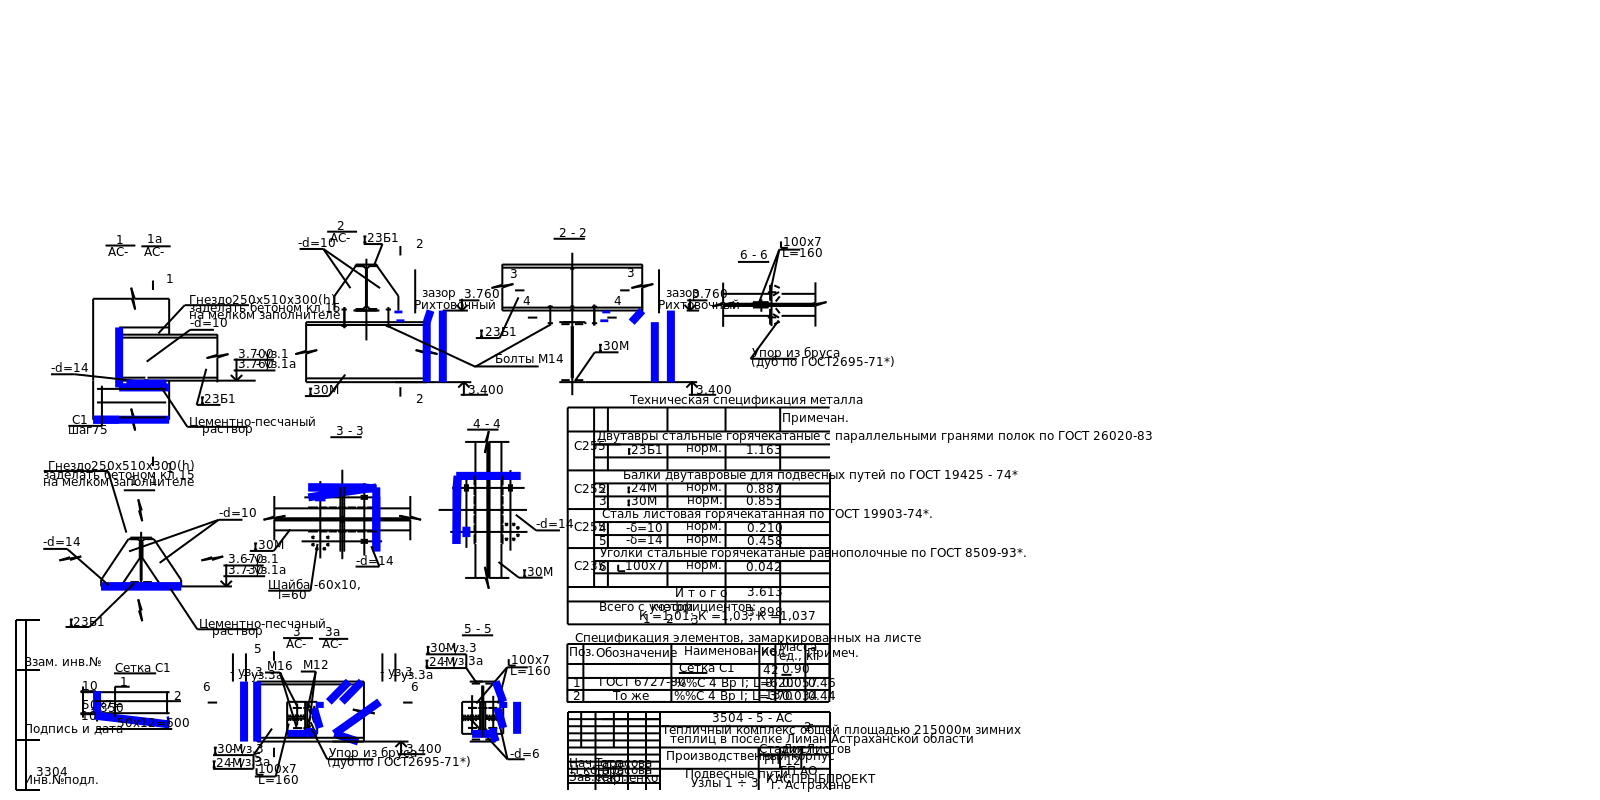

0195a12e-0226-4de9-b2a7-04c149af4aa0.png


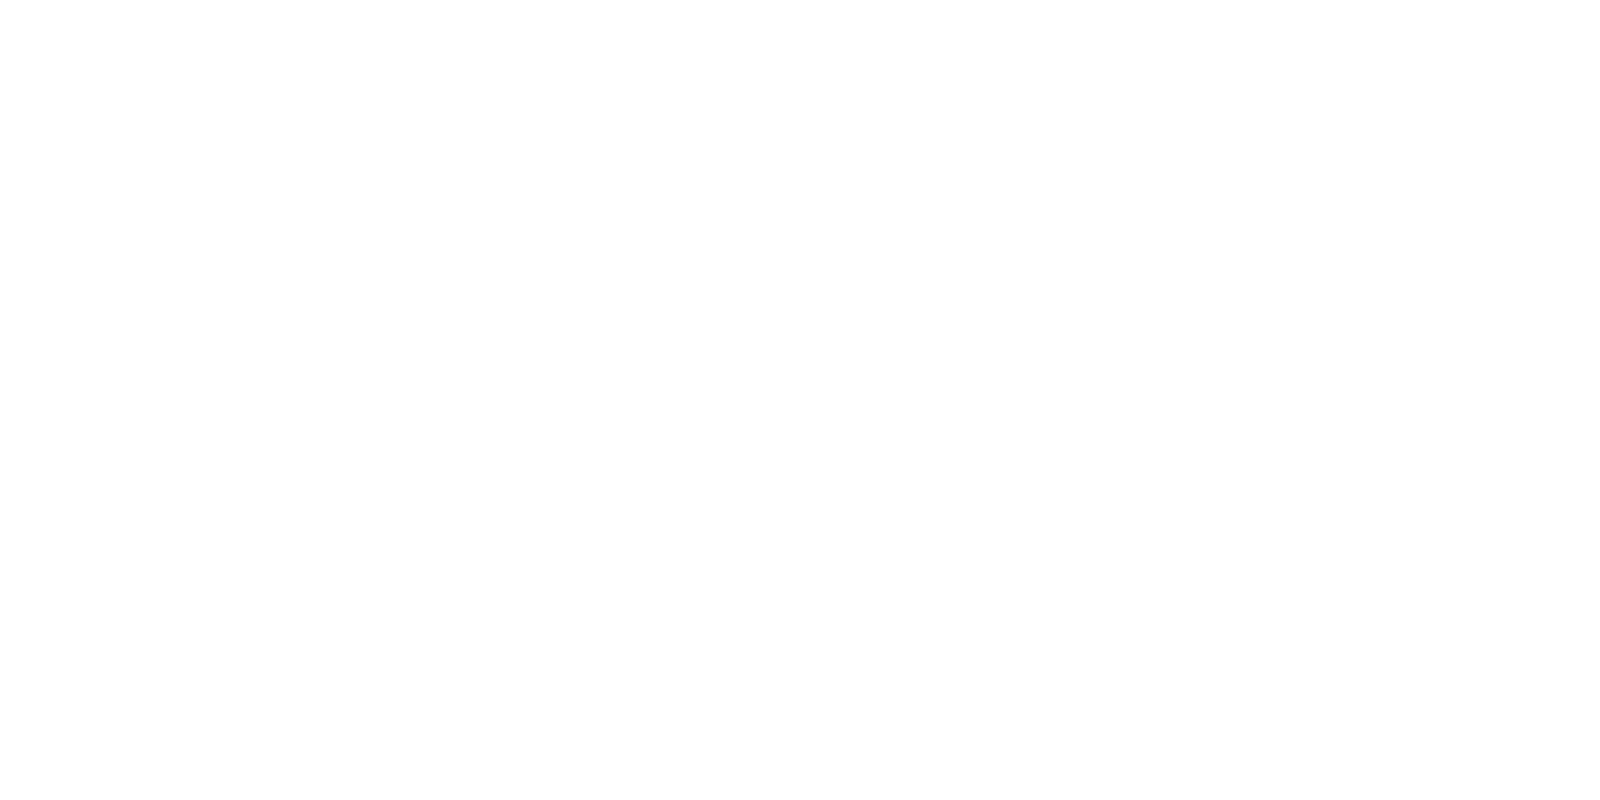

01aaf254-a108-4bb2-98c5-38caa8ab1efd.png


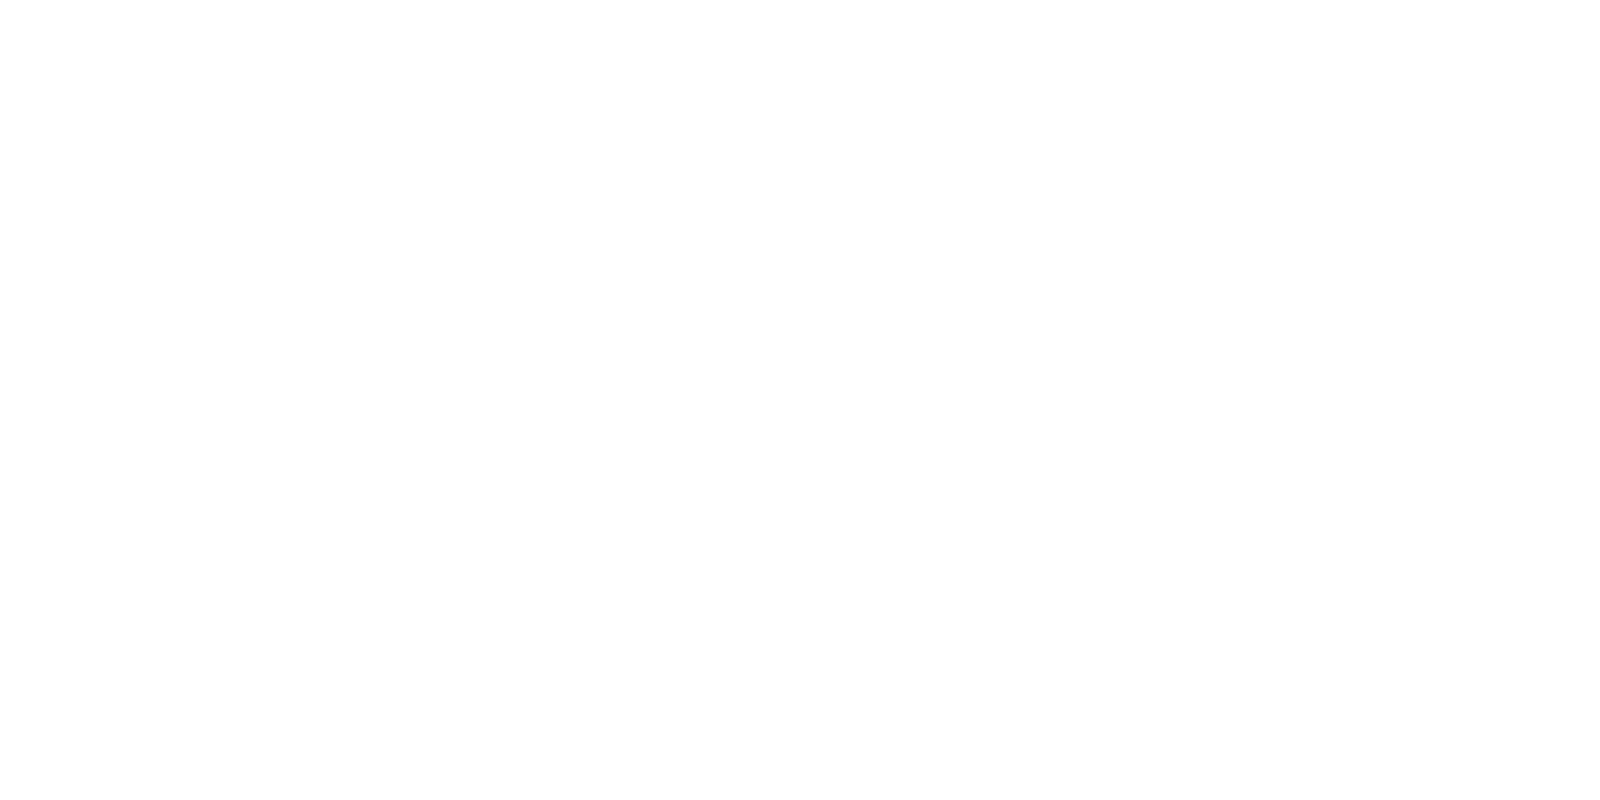

01afac87-2be6-4a8e-9a95-66c1c54d5165.png


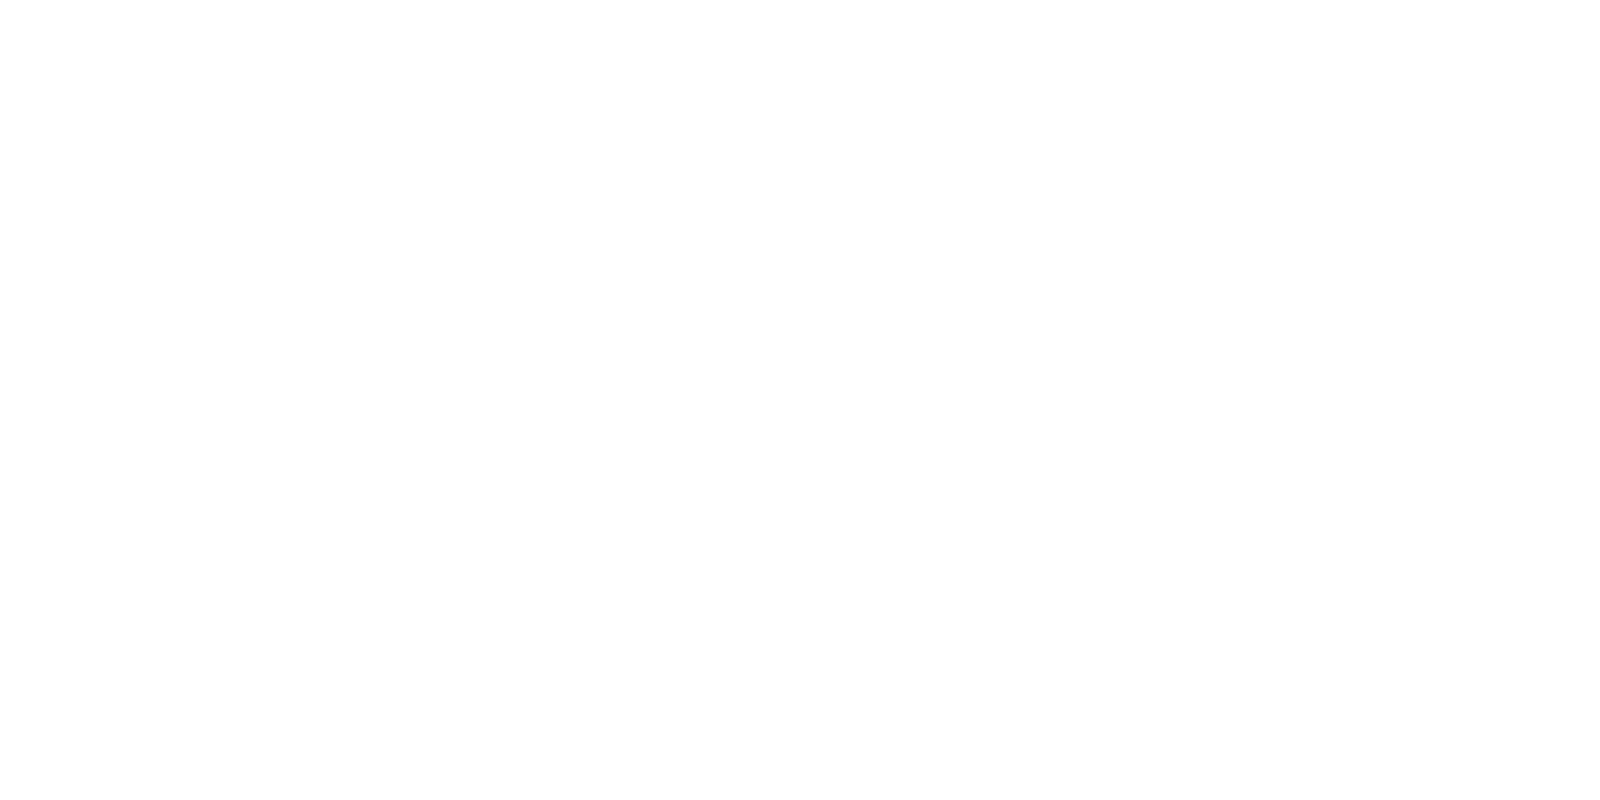

In [40]:
# https://stackoverflow.com/questions/11854847/how-can-i-display-an-image-from-a-file-in-jupyter-notebook
from IPython.display import Image
for img in images:
    print(img)
    display(Image(img))